In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [36]:
df.shape

(200, 5)

In [37]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [38]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

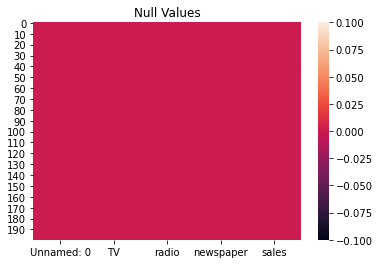

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

No Null Values present in the data set.

# Data Visualisation

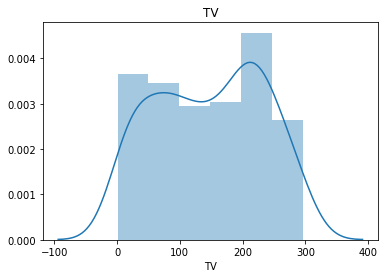

In [40]:
sns.distplot(df['TV'],kde=True)
plt.title('TV')
plt.show()

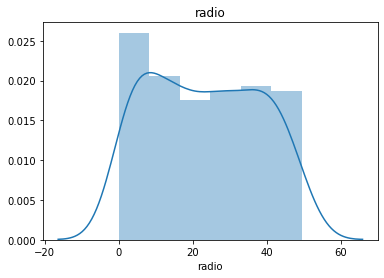

In [41]:
sns.distplot(df['radio'],kde=True)
plt.title('radio')
plt.show()

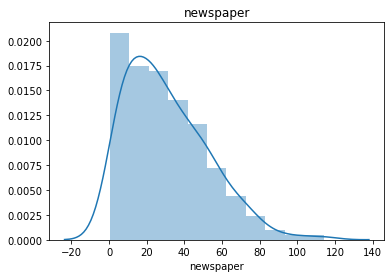

In [42]:
sns.distplot(df['newspaper'],kde=True)
plt.title('newspaper')
plt.show()

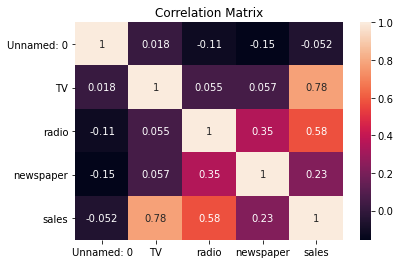

In [43]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

With our target variable highest correlation is 0.78 with TV.

In [44]:
corr_matrix=df.corr()
corr_matrix['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

In [45]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

Keeping +/-(0.5) as the range of skewness. Newspaper is 0.89 which is higher.

In [46]:
x=df.drop('sales', axis =1)
y=df['sales']

In [49]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [50]:
df.new.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

# Checking for outliers

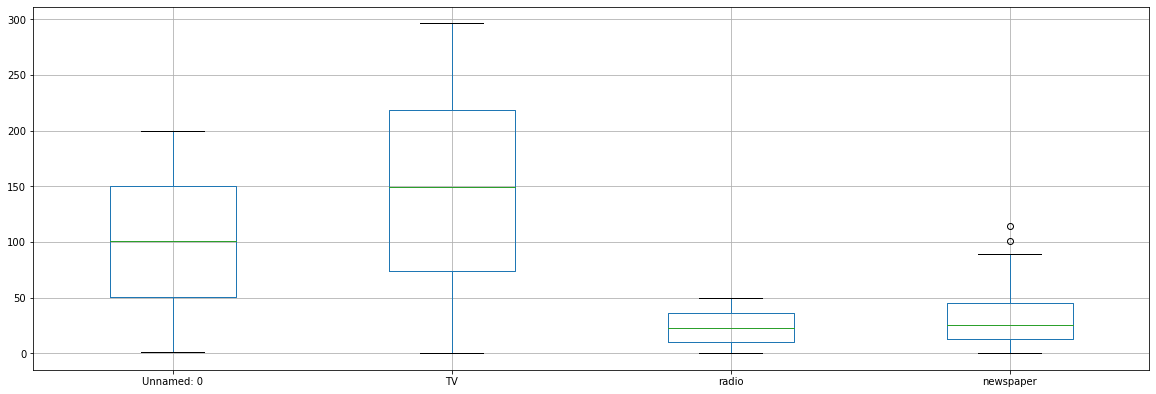

In [51]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

Very few outliers colud be seen at Newspaper. It can be left untreated.

# Scaling the data using Min-Max Scaler:

In [67]:
from sklearn.preprocessing import MinMaxScaler 
mms=MinMaxScaler() 
from sklearn.linear_model import LinearRegression 
lr=LinearRegression() 
from sklearn.metrics import r2_score 

In [70]:
for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train) 
    pred_train=lr.predict(x_train) 
    pred_test=lr.predict(x_test) 
    print (f"At randon state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}") 
    print (f"At random state {i}, the testing accuracy is:{r2_score(y_test,pred_test)}") 
    print("\n")

At randon state 0, the training accuracy is:- 0.9073274552252846
At random state 0, the testing accuracy is:0.856480214327925


At randon state 1, the training accuracy is:- 0.8959391993971187
At random state 1, the testing accuracy is:0.8928781912093181


At randon state 2, the training accuracy is:- 0.9152614531156523
At random state 2, the testing accuracy is:0.7570326409482367


At randon state 3, the training accuracy is:- 0.8931443451313652
At random state 3, the testing accuracy is:0.9134449674582059


At randon state 4, the training accuracy is:- 0.8911682084041699
At random state 4, the testing accuracy is:0.9084934434517352


At randon state 5, the training accuracy is:- 0.89570620107301
At random state 5, the testing accuracy is:0.89851958363058


At randon state 6, the training accuracy is:- 0.8915582028345674
At random state 6, the testing accuracy is:0.921941222913581


At randon state 7, the training accuracy is:- 0.8929171093102488
At random state 7, the testing accurac

At randon state 65, the training accuracy is:- 0.8969891176837769
At random state 65, the testing accuracy is:0.8942556589953752


At randon state 66, the training accuracy is:- 0.8992060099166295
At random state 66, the testing accuracy is:0.8838295132236418


At randon state 67, the training accuracy is:- 0.8995954079489461
At random state 67, the testing accuracy is:0.8813062371563375


At randon state 68, the training accuracy is:- 0.9004472797727481
At random state 68, the testing accuracy is:0.8669862566176891


At randon state 69, the training accuracy is:- 0.8870476050134384
At random state 69, the testing accuracy is:0.9233095015758521


At randon state 70, the training accuracy is:- 0.8862589587247461
At random state 70, the testing accuracy is:0.9261899619072469


At randon state 71, the training accuracy is:- 0.9170792242159567
At random state 71, the testing accuracy is:0.8214330315197064


At randon state 72, the training accuracy is:- 0.8939630309765105
At random state 7

In [90]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=99)

In [91]:
Ir.fit(x_train, y_train)

LinearRegression()

In [92]:
prd_test=lr.predict(x_test)

In [93]:
print (r2_score(y_test, pred_test))

0.9201416862699034


# Cross-validation of the model

In [95]:
Train_accuracy=r2_score(y_train,pred_train) 
Test_accuracy= r2_score(y_test,pred_test)

In [99]:
from sklearn.model_selection import cross_val_score 
for j in range (2,10):
    cv_score=cross_val_score (lr , x, y, cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")  
    print("\n")

 At cross fold 2 the cv score is 0.8557808905096393 and accuracy score for training is 0.8906644266587815 and accuracy score for testing is 0.9201416862699034


 At cross fold 3 the cv score is 0.8913539823868294 and accuracy score for training is 0.8906644266587815 and accuracy score for testing is 0.9201416862699034


 At cross fold 4 the cv score is 0.8858779626590163 and accuracy score for training is 0.8906644266587815 and accuracy score for testing is 0.9201416862699034


 At cross fold 5 the cv score is 0.8842777844741689 and accuracy score for training is 0.8906644266587815 and accuracy score for testing is 0.9201416862699034


 At cross fold 6 the cv score is 0.8877823078964706 and accuracy score for training is 0.8906644266587815 and accuracy score for testing is 0.9201416862699034


 At cross fold 7 the cv score is 0.8830284351379021 and accuracy score for training is 0.8906644266587815 and accuracy score for testing is 0.9201416862699034


 At cross fold 8 the cv score is 0

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=3 is selected.

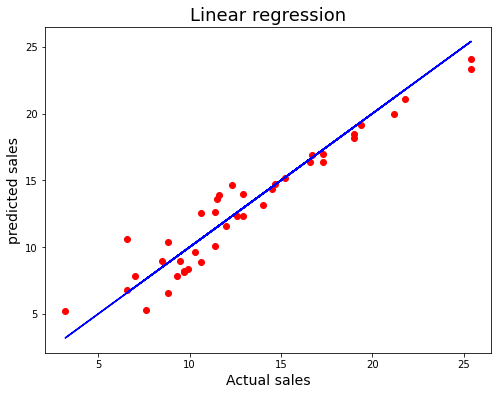

In [105]:
import matplotlib.pyplot as plt 
plt. figure(figsize=(8,6)) 
plt. scatter(x=y_test, y=pred_test, color='r') 
plt.plot(y_test, y_test, color='b') 
plt.xlabel('Actual sales', fontsize=14) 
plt.ylabel('predicted sales', fontsize=14) 
plt.title('Linear regression', fontsize=18) 
plt.show()

# Regularization

In [106]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

In [112]:
from sklearn.linear_model import Lasso 
parameters = {'alpha' : [.0001, .001, .01, .1, 1, 10], 'random_state' :list (range(0,10))} 
ls= Lasso() 
clf= GridSearchCV(ls, parameters) 
clf.fit(x_train, y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [116]:
ls=Lasso(alpha=1, random_state=0) 
ls.fit(x_train, y_train) 
ls.score(x_train, y_train) 
pred_ls=ls.predict(x_test) 
lss = r2_score(y_test ,pred_ls) 
lss

0.9202956601818486

In [119]:
cv_score=cross_val_score (ls , x, y,cv=3) 
cv_mean=cv_score.mean() 
cv_mean

0.8920846196072324

# Ensemble Technique

In [138]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor 


parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt','log2']}
rf=RandomForestRegressor() 
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train,y_train) 
print (clf.best_params_)
              
        

{'criterion': 'mae', 'max_features': 'auto'}


In [143]:
rf=RandomForestRegressor (criterion="mse", max_features="auto") 
rf.fit(x_train, y_train) 
rf.score(x_train,y_train) 
pred_decision =rf.predict(x_test) 

rfs = r2_score(y_test, pred_decision) 
print('R2 core:' , rfs*100 ) 
     
rfscore = cross_val_score( rf,x,y,cv=3) 
rfc = rfscore.mean() 
print('Cross Val Score:',rfc* 100)

R2 core: 98.17427138069993
Cross Val Score: 96.93364427442009


In [146]:
import pickle 
filename = 'Advertising_project.pkl'
pickle.dump(rf, open( filename, 'wb' ))

# Conclusion

In [147]:
loaded_model = pickle.load(open('Advertising_project.pkl', 'rb')) 
result = loaded_model.score(x_test, y_test)

print(result)

0.9817427138069993


In [153]:
conclusion=pd. DataFrame([loaded_model.predict(x_test)[:], pred_decision[:]], index=["Predicted", "orginal"])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,11.735,9.108,10.129,8.208,6.817,22.571,12.199,24.308,6.209,18.638,...,11.341,24.298,18.34,12.132,10.669,14.967,13.117,16.939,11.884,8.666
orginal,11.735,9.108,10.129,8.208,6.817,22.571,12.199,24.308,6.209,18.638,...,11.341,24.298,18.34,12.132,10.669,14.967,13.117,16.939,11.884,8.666
